In [2]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

# 資料表公司合併

In [38]:
for i in range(2015,2020):
    us = pd.read_csv("competitor_df/company/lda_us_{}.csv".format(i))
    us_a = pd.read_csv("competitor_df/company/lda_us_{}.csv".format(i+1))
    
    us.rename(columns = {'cpc':'cpc_{}'.format(i), 'country':'country_{}'.format(i)}, inplace = True)
    us_a.rename(columns = {'cpc':'cpc_{}'.format(i+1), 'country':'country_{}'.format(i+1)}, inplace = True)
    
    if i != 2015:
        us_all = pd.merge(us_all,us_a, on=['company'],how='outer')
    else:
        us_all = pd.merge(us,us_a, on=['company'],how='outer')
    
    
    

In [39]:
us_all

,company,cpc_2015,country_2015,cpc_2016,country_2016,cpc_2017,country_2017,cpc_2018,country_2018,cpc_2019,country_2019,cpc_2020,country_2020
0,Intel,0.060041,0.225982,0.167661,0.355784,0.071131,0.278684,0.072211,0.268343,0.125446,0.304417,0.076885,0.328528
1,Ericsson,0.223562,0.348837,0.308044,0.414100,0.048276,0.199208,0.058596,0.200094,0.097531,0.198698,NaN,NaN
2,Qualcomm,0.218622,0.350981,0.242999,0.338823,0.042257,0.181205,0.068832,0.175903,0.134405,0.222809,0.154709,0.356850
3,Cisco Systems,0.382149,0.618974,0.487658,0.747794,0.200960,0.472250,0.152728,0.421779,0.132213,0.373297,0.250489,0.553770
4,Afero,0.373407,0.630410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IBM,0.390548,0.647998,0.473348,0.750641,0.101298,0.337349,0.078946,0.354751,0.046212,0.313657,0.150950,0.477923
6,Microsoft,0.418443,0.586912,0.679417,0.839824,0.256167,0.470661,0.198228,0.412801,0.168210,0.378882,0.330829,0.646414
7,Convida Wireless LLC,0.520110,0.658039,0.966294,1.111789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Apple,0.520518,0.646072,NaN,NaN,0.447966,0.695625,0.250076,0.431241,0.233415,0.413501,NaN,NaN
9,Nokia,0.602767,0.754441,1.041511,1.183638,0.393310,0.557917,0.255761,0.412338,0.442163,0.585204,0.579833,0.752980


In [58]:
cpc_ls = list(-us_all[us_all.company=="Intel"].iloc[:,[1,3,5,7,9,11]].values[0])
country_ls = list(-us_all[us_all.company=="Intel"].iloc[:,[2,4,6,8,10,12]].values[0])
year = list(range(2015,2021))

In [57]:
-us_all[us_all.company=="Intel"].iloc[:,[1,3,5,7,9,11]].values[0]

array([-0.06004114, -0.16766145, -0.07113094, -0.07221143, -0.12544598,
       -0.07688506])

In [48]:
df = pd.DataFrame((zip(year, cpc_ls, country_ls)), columns = ['year','cpc', 'country'])

In [49]:
df

,year,cpc,country
0,2015,-0.060041,-0.225982
1,2016,-0.167661,-0.355784
2,2017,-0.071131,-0.278684
3,2018,-0.072211,-0.268343
4,2019,-0.125446,-0.304417
5,2020,-0.076885,-0.328528


# Scatter plot

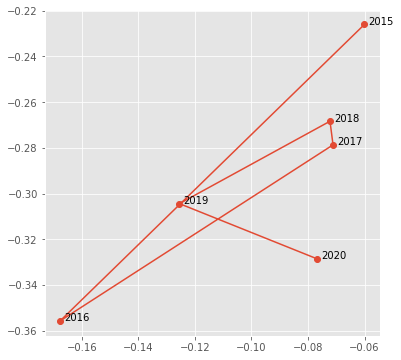

In [73]:
plt.figure(figsize=(6,6))
plt.style.use('ggplot')

plt.plot("cpc", "country", data=df, linestyle='-', marker='o')
# plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)

for i, txt in enumerate(df.year):
    plt.text(df.cpc[i]+0.0015, df.country[i],txt)


plt.show()

In [66]:
for i, txt in enumerate(df.year):
    print(df.cpc[i])
    # plt.text(-df.cpc[i], -df.country[i],txt.split(" ")[0])

-0.0600411409029895
-0.1676614499104834
-0.0711309410060329
-0.0722114279759647
-0.1254459754914161
-0.0768850589582878
